In [1]:
import pandas as pd

# 读取CSV文件
df_education_2011 = pd.read_csv('data/2011_education.csv')
df_education_2021 = pd.read_csv('data/2021_education.csv')

# 提取所需部分 (第二部分)
df_education_2011['Area'] = df_education_2011['Area'].str.split(':').str[1].str.strip()
df_education_2021['Area'] = df_education_2021['Area'].str.split(':').str[1].str.strip()

# 计算新值
df_education_2011['2011'] = (100 - df_education_2011['2011']) / 100
df_education_2021['2021'] = (100 - df_education_2021['2021']) / 100

# 查看
print("Merged DataFrame:\n", df_education_2011)
print("Merged DataFrame:\n", df_education_2021)

Merged DataFrame:
            Area   2011
0     E01000001  0.224
1     E01000002  0.208
2     E01000003  0.432
3     E01000005  0.655
4     E01032739  0.264
...         ...    ...
4830  E01002496  0.748
4831  E01002497  0.738
4832  E01002498  0.715
4833  E01002499  0.733
4834  E01032577  0.734

[4835 rows x 2 columns]
Merged DataFrame:
            Area   2021
0     E01000001  0.167
1     E01000002  0.163
2     E01000003  0.299
3     E01000005  0.597
4     E01032739  0.229
...         ...    ...
4989  E01002496  0.649
4990  E01002497  0.581
4991  E01002498  0.587
4992  E01002499  0.635
4993  E01032577  0.603

[4994 rows x 2 columns]


In [2]:
# 合并数据框
merged_df = pd.merge(df_education_2011[['Area', '2011']], df_education_2021[['Area', '2021']], on='Area', how='left')

# 计算每一列的平均值
mean_2011 = merged_df['2011'].mean()
mean_2021 = merged_df['2021'].mean()

# 填充缺失值
merged_df['2011'].fillna(mean_2011, inplace=True)
merged_df['2021'].fillna(mean_2021, inplace=True)

# 添加change列
merged_df['change'] = merged_df['2021'] - merged_df['2011']

# 查看合并后的数据框
print("Merged DataFrame:\n", merged_df)

merged_df.to_csv('description_data/education.csv', index=False)

Merged DataFrame:
            Area   2011   2021  change
0     E01000001  0.224  0.167  -0.057
1     E01000002  0.208  0.163  -0.045
2     E01000003  0.432  0.299  -0.133
3     E01000005  0.655  0.597  -0.058
4     E01032739  0.264  0.229  -0.035
...         ...    ...    ...     ...
4830  E01002496  0.748  0.649  -0.099
4831  E01002497  0.738  0.581  -0.157
4832  E01002498  0.715  0.587  -0.128
4833  E01002499  0.733  0.635  -0.098
4834  E01032577  0.734  0.603  -0.131

[4835 rows x 4 columns]


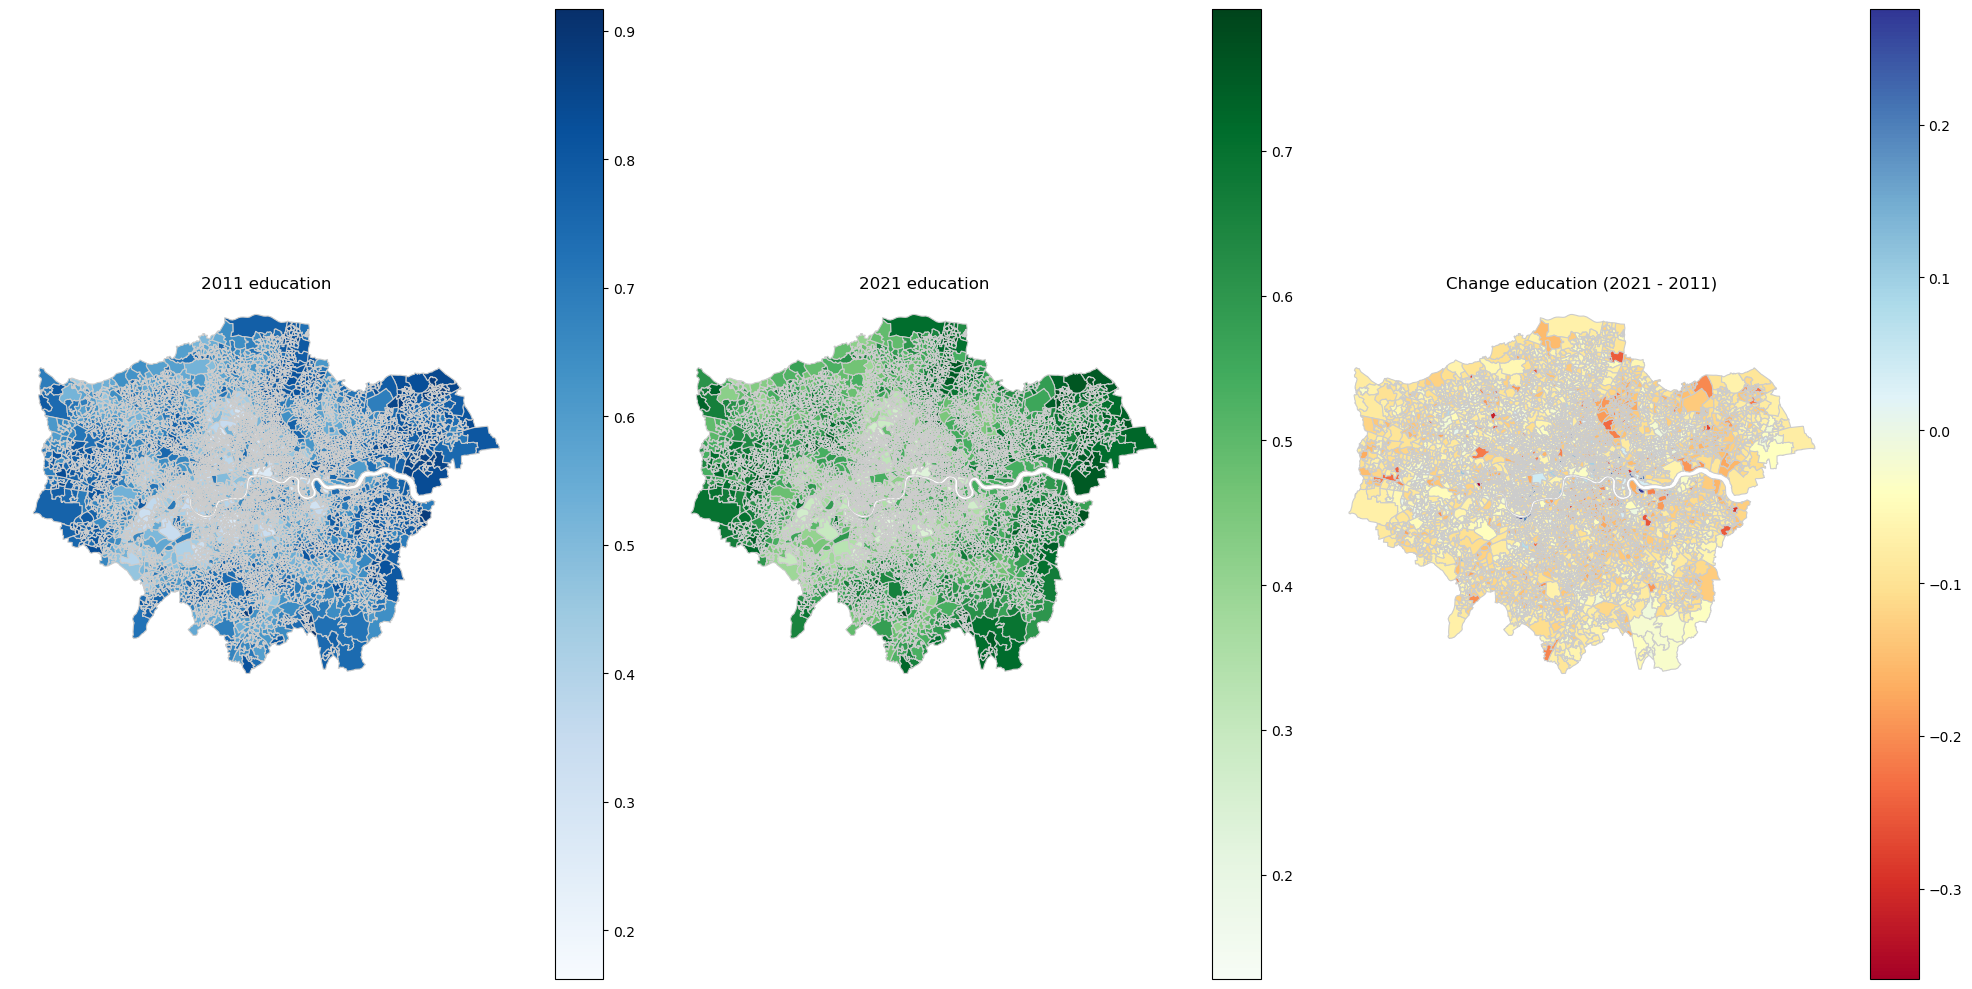

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取shapefile
gdf = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp')

# 合并shapefile和处理好的数据
gdf = gdf.merge(merged_df, left_on='LSOA11CD', right_on='Area', how='left')

# 设置地图的投影
gdf = gdf.to_crs(epsg=4326)

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# 绘制2011年的地图
gdf.plot(column='2011', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('2011 education')

# 绘制2021年的地图
gdf.plot(column='2021', cmap='Greens', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('2021 education')

# 绘制变化的地图
gdf.plot(column='change', cmap='RdYlBu', linewidth=0.8, ax=axes[2], edgecolor='0.8', legend=True)
axes[2].set_title('Change education (2021 - 2011)')

# 隐藏坐标轴
for ax in axes:
    ax.set_axis_off()

# 显示地图
plt.tight_layout()
plt.show()

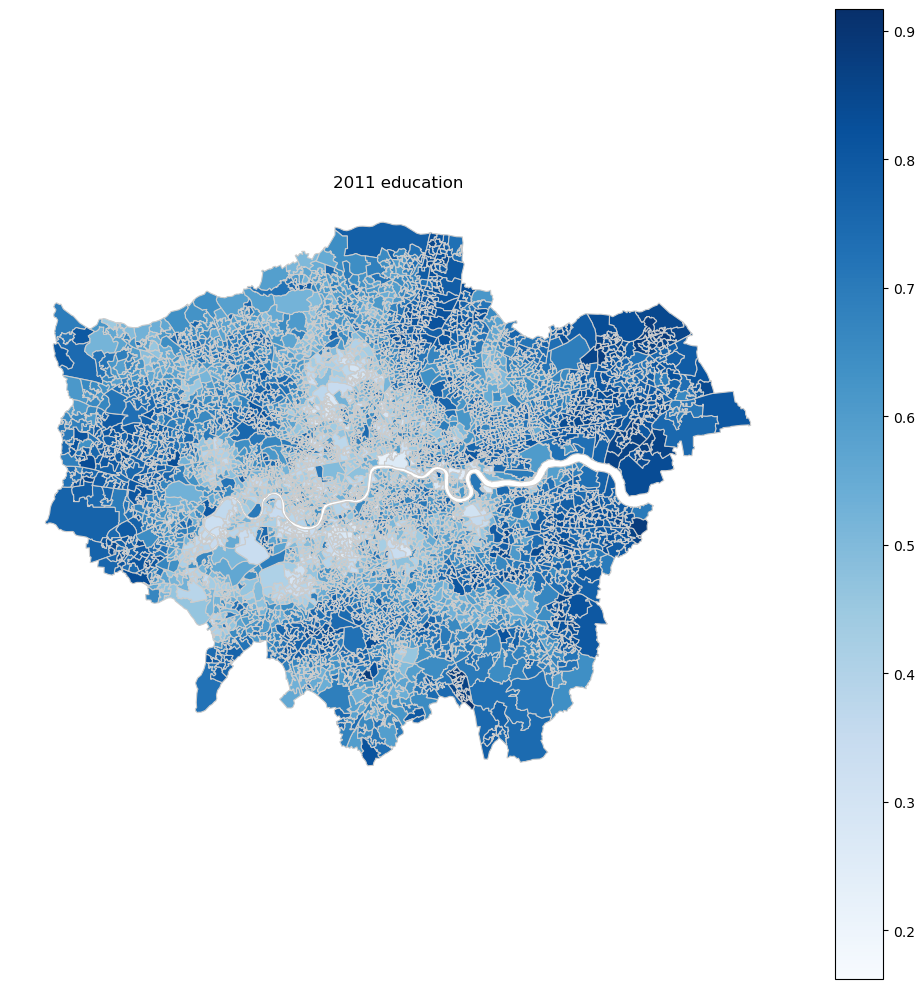

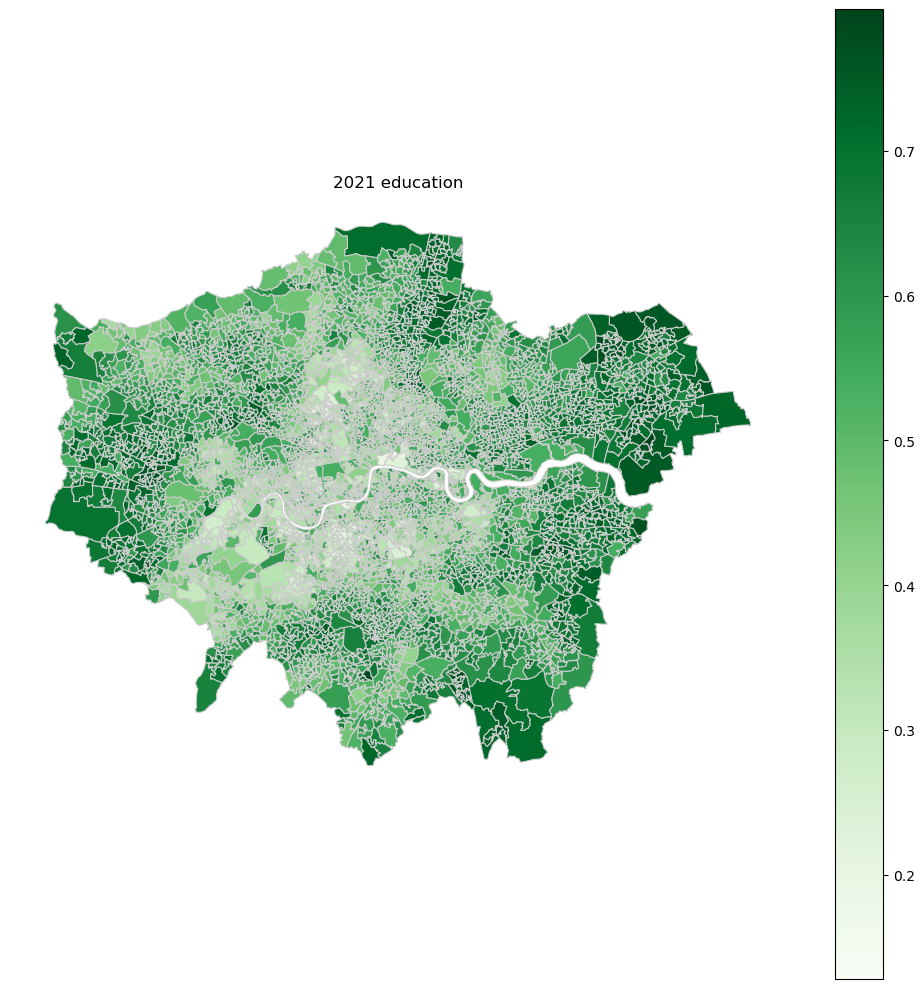

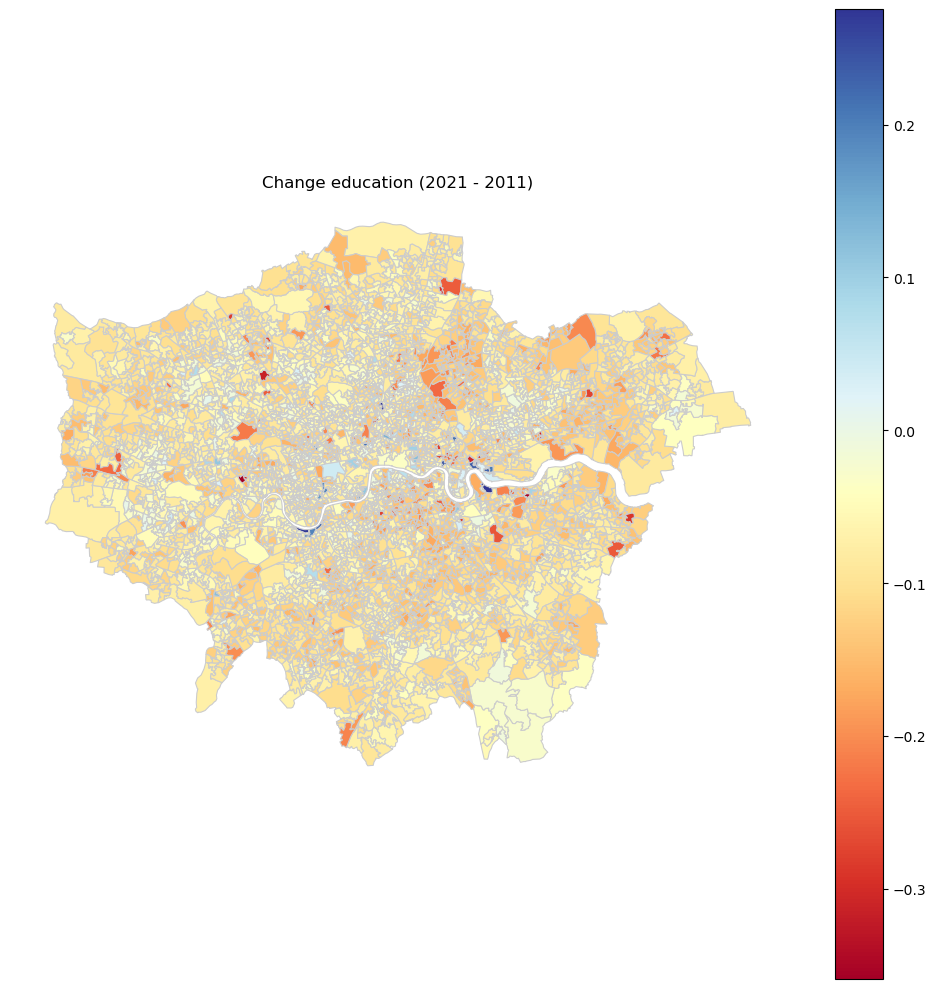

In [4]:
# 绘制2011年的地图
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='2011', cmap='Blues', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('2011 education')
ax1.set_axis_off()
plt.tight_layout()
plt.show()

# 绘制2021年的地图
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='2021', cmap='Greens', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('2021 education')
ax2.set_axis_off()
plt.tight_layout()
plt.show()

# 绘制变化的地图
fig3, ax3 = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='change', cmap='RdYlBu', linewidth=0.8, ax=ax3, edgecolor='0.8', legend=True)
ax3.set_title('Change education (2021 - 2011)')
ax3.set_axis_off()
plt.tight_layout()
plt.show()